In [3]:
# 1. Introduction
    # § Purpose of the project
    # § Main assumptions (unexamined beliefs about the case)
# 2. Data
    # § Description of the data set
    # § Preparation of data for modeling
# 3. Modeling
# 4. Evaluation (quality of obtained results)
# 5. Summary
    # § Was the purpose achieved?
    # § Were the assumptions examined?
    # § Formulate conclusions from obtained results
# 6. Appendix with source code and data set

In [4]:
# ! pip install nltk
# ! pip install spellchecker

In [16]:
#----------------------------------- Library ---------------------------------------
import pandas as pd
import numpy as np
from datetime import datetime
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
#----------------------------------- Data ---------------------------------------
from google.colab import drive
drive.mount('/content/gdrive')

df=pd.read_csv('/content/gdrive/MyDrive/1.Own Files/1.MAIN_FILES/Project_2023Y1/TextMining/bbc_news.csv')

Mounted at /content/gdrive


In [17]:
#----------------------------------- Data Prepare ---------------------------------------
df=df[['title','pubDate','description']]
df['workday']=df['pubDate'].str.slice(0, 3)
df['date']=df['pubDate'].str.slice(4, 16)
df['hour']=df['pubDate'].str.slice(17, 25)

df["date"] = df["date"].apply(lambda x: x.replace(" Jan ", "-01-"))

for i,j in zip([' Jan ',' Feb ',' Mar ',' Apr ',' May ',' Jun ',' Jul ',' Aug ',' Sep ',' Oct ',' Nov ',' Dec '],['-01-','-02-','-03-','-04-','-05-','-06-','-07-','-08-','-09-','-10-','-11-','-12-']):
    df["date"] = df["date"].apply(lambda x: x.replace(i, j))

df['date_fixed']=df['date'].str.slice(4,6)+'-'+df['date'].str.slice(0,3)+'-'+df['date'].str.slice(7,11)
df['date_fixed'] = pd.to_datetime(df['date_fixed'])
df['year'] = df['date_fixed'].dt.strftime('%Y')
df['month'] = df['date_fixed'].dt.strftime('%m')
df['hour_24']=df['hour'].str.slice(0, 2)
df = df.drop('date', axis=1)

df['num_word']=df["description"].apply(lambda n: len(n.split()))

#----------------------------------- Data cleaning ---------------------------------------
df['description'] = df['description'].str.lower() # lower case

df.description = df.description.replace('\d+', '', regex=True, inplace=False) # remove numbers
df.description = df.description.replace('[^\w\s]', '', regex=True, inplace=False) # remove special characters such as .,%$?!

stop = stopwords.words('english')
df['description'] = df['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)])) # remove stop words such as that, what...

lemmatizer = WordNetLemmatizer() # Lemmatization or Stemming, prefix
def lemmatize_words(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word,pos='v') for word in words]
    return ' '.join(words)
df['description'] = df['description'].apply(lemmatize_words)

df=df.drop_duplicates() # Remove duplicate
df['description'].isna().sum() # Remove missing data

df['description'] = df['description'].str.strip() # Remove whitespace

<ipython-input-17-6edc8ed37630>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['workday']=df['pubDate'].str.slice(0, 3)
<ipython-input-17-6edc8ed37630>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date']=df['pubDate'].str.slice(4, 16)
<ipython-input-17-6edc8ed37630>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [10]:
df.head()

,title,pubDate,description,workday,hour,date_fixed,year,month,hour_24,num_word
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",ukrainian president say country forgive forget...,Mon,08:01:56,2022-03-07,2022,03,08,16
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",jeremy bowen frontline irpin residents come ru...,Sun,22:49:58,2022-03-06,2022,03,22,18
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",one worlds biggest fertiliser firm say conflic...,Mon,00:14:42,2022-03-07,2022,03,00,17
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",parent manchester arena bomb youngest victim s...,Mon,00:05:40,2022-03-07,2022,03,00,16
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",consumers feel impact higher energy cost fuel ...,Mon,08:15:53,2022-03-07,2022,03,08,16


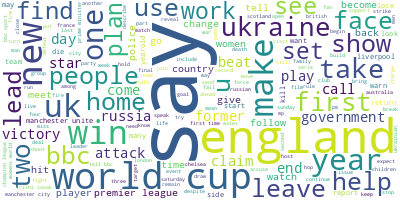

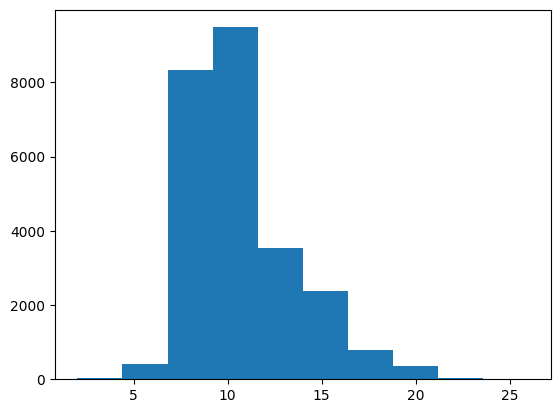

In [18]:
#----------------------------------- Explanatory analysis ---------------------------------------
len(df) # len
import matplotlib.pyplot as plt

df_hist=df.groupby(['year'])['year'].count().reset_index(name='num') # year
# plt.bar(df_hist['year'],df_hist['num'])

df_hist=df.groupby(['month'])['month'].count().reset_index(name='num') # year
# plt.bar(df_hist['month'],df_hist['num'])

df_hist=df.groupby(['hour_24'])['hour_24'].count().reset_index(name='num') # year
# plt.bar(df_hist['hour_24'],df_hist['num'])

plt.hist(df.num_word)
df['num_word'].describe() # stat word number

#----------------------------------- Outlier or Remove ---------------------------------------
df=df[df['year']>="2022"]

#----------------------------------- Word cloud ---------------------------------------
from wordcloud import WordCloud
words = ','.join(list(df['description'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(words)
wordcloud.to_image()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,Cluster 11,Cluster 12,Cluster 13
0,people,league,seven,uk,rise,new,years,world,say,bbc,live,strike,minister,ukraine
1,say,manchester,past,say,price,york,make,cup,police,tell,cost,rail,prime,war
2,young,premier,days,people,rate,say,england,england,make,sport,rise,workers,say,russia
3,kill,unite,closely,government,energy,zealand,win,womens,england,speak,help,readers,mps,invasion
4,die,champion,attention,data,food,england,police,win,president,news,say,pay,truss,russian
5,help,city,whats,coronavirus,soar,government,home,final,family,look,crisis,union,liz,say
6,home,win,pay,come,inflation,test,year,watch,want,investigation,struggle,selection,leader,russias
7,children,beat,selection,explore,fall,pm,lead,beat,need,reveal,energy,action,rishi,flee
8,know,season,image,case,remain,make,time,qatar,time,radio,calculator,image,face,eastern
9,elderly,score,globe,warn,rat,plan,come,englands,man,england,household,train,cabinet,people


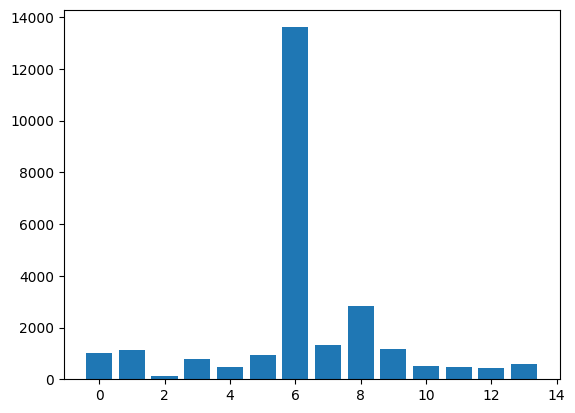

In [12]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from sklearn.metrics import silhouette_score
vectorizer = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english')
X = vectorizer.fit_transform(df['description'])
kmean = KMeans(n_clusters=14)
Y = kmean.fit_predict(X)
x_bar=pd.DataFrame(Y)
x_bar = x_bar.set_axis(['V'], axis=1)
x_bar=x_bar.groupby(['V'], as_index = False)['V'].count()
x_bar
plt.bar(x_bar.index,x_bar['V'])
feat = kmean.cluster_centers_.argsort()[:, ::-1]
facts = vectorizer.get_feature_names_out()
results={}
for i in range(14):
    list_ter = []
    for ind in feat[i, :10]:
        list_ter.append(facts[ind])
    results[f'Cluster {i}'] = list_ter
df_clusters = pd.DataFrame.from_dict(results)
df_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2 :  0.0023350636333179194


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3 :  0.0032605684771027225


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4 :  0.003882185628662895


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5 :  0.00379961314748246


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


6 :  0.004919559536280984


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7 :  0.005581562340112966


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


8 :  0.006034458633975219


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


9 :  0.006441499750651985


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


10 :  0.0069168179588395915


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


11 :  0.006960301922431982


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


12 :  0.0074120102042071374


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


13 :  0.0075770698205086355


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


14 :  0.008368864430832403


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


15 :  0.008718493211872576


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,Cluster 11,Cluster 12,Cluster 13
0,thousands,attack,cup,women,new,seven,england,bbc,league,rise,time,president,people,say
1,state,israel,world,say,york,past,win,uk,manchester,price,say,say,say,police
2,workers,hamas,england,bbc,say,days,watch,years,premier,cost,second,ukraines,young,make
3,hundreds,say,womens,men,zealand,selection,open,make,unite,energy,years,putin,kill,minister
4,queen,kill,final,change,government,image,victory,tell,champion,live,win,zelensky,million,family
5,funeral,police,win,children,england,closely,beat,ukraine,city,rate,champion,biden,home,ukraine
6,tens,russian,qatar,experience,leader,attention,test,home,win,food,beat,ukraine,uk,uk
7,unite,die,watch,help,pm,whats,final,police,score,soar,england,russian,help,want
8,widespread,palestinian,englands,transgender,plan,pay,day,lead,season,household,year,joe,die,need
9,cause,ukrainian,france,girls,test,strike,championship,year,arsenal,inflation,reach,russias,live,help


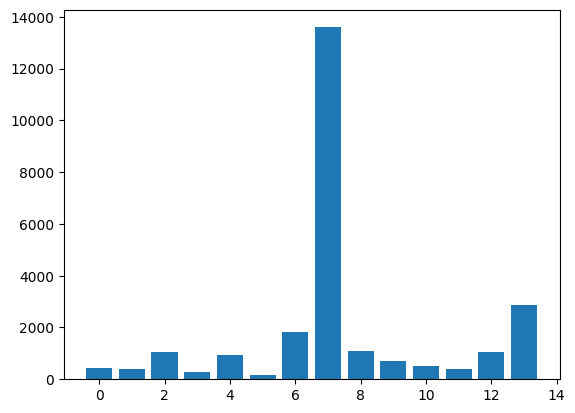

In [ ]:
# ---------------- Text clustering ----------------
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from sklearn.metrics import silhouette_score

vectorizer = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english')
X = vectorizer.fit_transform(df['description'])

# KMeans
for n in range(2, 16):
  kmean = KMeans(n_clusters=n)
  Y = kmean.fit_predict(X)
  print(n,': ', silhouette_score(X, Y))
kmean = KMeans(n_clusters=14)
Y = kmean.fit_predict(X)
x_bar=pd.DataFrame(Y)
x_bar = x_bar.set_axis(['V'], axis=1)
x_bar=x_bar.groupby(['V'], as_index = False)['V'].count()
x_bar
plt.bar(x_bar.index,x_bar['V'])
feat = kmean.cluster_centers_.argsort()[:, ::-1]
facts = vectorizer.get_feature_names_out()
results={}
for i in range(14):
    list_ter = []
    for ind in feat[i, :10]:
        list_ter.append(facts[ind])
    results[f'Cluster {i}'] = list_ter
df_clusters = pd.DataFrame.from_dict(results)
df_clusters

In [ ]:
# DBSCAN
from sklearn.cluster import DBSCAN
eps = np.linspace(0.1, 1.0, 5)
for n in eps:
  dbs = DBSCAN(eps=n, min_samples=4)
  Y = dbs.fit_predict(X)
  print(n,': ', silhouette_score(X, Y)) #Silhouette Score:  A score of 1 means that the point is well-matched to its own cluster, and a score of -1 means that it is better matched to another cluster
dbs = DBSCAN(eps=1, min_samples=4)
Y = dbs.fit_predict(X)
feat = kmean.cluster_centers_.argsort()[:, ::-1]
facts = vectorizer.get_feature_names_out()
results={}
for i in range(5):
    list_ter = []
    for ind in feat[i, :10]:
        list_ter.append(facts[ind])
    results[f'Cluster {i}'] = list_ter
df_clusters = pd.DataFrame.from_dict(results)
df_clusters

0.1 :  -0.030431819245243644
0.325 :  -0.030828870268415607
0.55 :  -0.0318264606054618
0.775 :  -0.03559261879691013
1.0 :  -0.01975364377441458


,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,thousands,attack,cup,women,new
1,state,israel,world,say,york
2,workers,hamas,england,bbc,say
3,hundreds,say,womens,men,zealand
4,queen,kill,final,change,government
5,funeral,police,win,children,england
6,tens,russian,qatar,experience,leader
7,unite,die,watch,help,pm
8,widespread,palestinian,englands,transgender,plan
9,cause,ukrainian,france,girls,test


In [ ]:
lda.print_topics()

NameError: name 'lda' is not defined

In [19]:
# ---------------- Topic Modeling ----------------
df1 = df.description.values.tolist()
clean_corpus = [doc.split() for doc in df1]
from gensim import corpora
dictionary = corpora.Dictionary(clean_corpus)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in clean_corpus]

# LSA model
from gensim.models import LsiModel
lsa = LsiModel(doc_term_matrix, num_topics=10, id2word = dictionary)
print(lsa.print_topics(num_topics=10, num_words=10))

# LDA model
from gensim.models import LdaModel
lda = LdaModel(doc_term_matrix, num_topics=10, id2word = dictionary)
print(lda.print_topics(num_topics=10, num_words=10))

[(0, '0.822*"say" + 0.202*"world" + 0.172*"cup" + 0.141*"england" + 0.096*"win" + 0.093*"first" + 0.089*"people" + 0.084*"new" + 0.075*"take" + 0.074*"league"'), (1, '-0.493*"world" + 0.476*"say" + -0.425*"cup" + -0.212*"england" + -0.208*"win" + -0.163*"first" + -0.129*"womens" + -0.125*"league" + -0.119*"final" + -0.107*"bbc"'), (2, '-0.442*"world" + -0.337*"cup" + 0.295*"league" + 0.229*"first" + 0.208*"bbc" + -0.206*"say" + 0.186*"manchester" + 0.175*"people" + 0.141*"new" + 0.138*"win"'), (3, '0.428*"bbc" + -0.338*"league" + 0.331*"people" + -0.247*"win" + -0.227*"manchester" + 0.164*"tell" + -0.138*"champion" + -0.136*"premier" + -0.136*"unite" + 0.135*"new"'), (4, '0.495*"bbc" + -0.402*"first" + -0.352*"england" + 0.255*"league" + -0.248*"new" + 0.224*"manchester" + 0.166*"sport" + 0.142*"unite" + 0.138*"tell" + 0.130*"premier"'), (5, '0.577*"people" + -0.483*"england" + -0.416*"bbc" + 0.184*"world" + -0.138*"sport" + -0.116*"tell" + -0.115*"new" + 0.114*"cup" + 0.099*"ukraine" 

In [20]:
# ---------------- Sentiment analysis ----------------
res_text=[]
res_res=[]
res_pol=[]
res_sub=[]
from textblob import TextBlob
for text in df1:
    sent = TextBlob(text)
    pol = sent.sentiment.polarity
    sub = sent.sentiment.subjectivity
    if pol > 0:
        res = "Positive"
    elif pol < 0:
        res = "Negative"
    else:
        res = "Neutral"
    res_text.append(text)
    res_res.append(res)
    res_pol.append(pol)
    res_sub.append(sub)

In [21]:
data = {'text': res_text,
        'res': res_res,
        'pol': res_pol,
        'sub': res_sub}
result_sentiment = pd.DataFrame(data)
print(result_sentiment)

                                                    text       res    pol  \
0      ukrainian president say country forgive forget...   Neutral  0.000   
1      jeremy bowen frontline irpin residents come ru...   Neutral  0.000   
2      one worlds biggest fertiliser firm say conflic...  Negative -0.200   
3      parent manchester arena bomb youngest victim s...  Negative -0.075   
4      consumers feel impact higher energy cost fuel ...  Positive  0.250   
...                                                  ...       ...    ...   
25376  emily hand kibbutz beeri three miles gaza hama...   Neutral  0.000   
25377  elderly grandparents young children people kno...  Positive  0.150   
25378  rebel seize car carrier red sea claim israeli ...   Neutral  0.000   
25379  chancellor jeremy hunt set unveil governments ...   Neutral  0.000   
25380  millions lowincome households receive latest c...  Positive  0.500   

        sub  
0      0.00  
1      0.00  
2      0.40  
3      0.05  
4    

In [22]:
result_sentiment.groupby(['res'])['res'].count()

res
Negative     4638
Neutral     11835
Positive     8908
Name: res, dtype: int64